# Bajamos librerías y data para colab

In [ ]:
! wget https://github.com/lab-pep-itba/clase-2--Probabilidad/raw/master/alturas-pesos-1-train.csv

In [ ]:
! wget https://github.com/lab-pep-itba/clase-2--Probabilidad/raw/master/alturas-pesos-train.csv

In [ ]:
! wget https://github.com/lab-pep-itba/clase-2--Probabilidad/raw/master/helper.py

In [ ]:
! wget https://github.com/lab-pep-itba/clase-2--Probabilidad/raw/master/bernoulli_1.npy

In [ ]:
! wget https://github.com/lab-pep-itba/clase-2--Probabilidad/raw/master/bernoulli_2.npy

# Variables Aleatorias

Mapeo de la salida de un experimento aleatorio al eje real

## V.A. Bernoulli

Experimento con 2 salidas posibles, muchas veces representado por los valores 0 y 1 en el eje real.

Ejemplo clasico de la moneda:
- Mapeo la cara en el valor del eje real 1
- Mapeo la seca en el valor del eje real 0

Definición general de la V.A de Bernoulli

$P(X= cara) = P(X=1) = p$

$P(X= seca) = P(X=0) = 1-p$

$p$ es el único parámetro que describe una variable aleatoria de bernoulli

## Como estimamos p? 

### Opcion 1: 
### Suponer a priori que las probabilidades de todas las salidas es la misma (Fair Coin)

$\huge p = \frac{N_p}{N}$

$N_p$ = Numero de resultados favorables

$N$ = Numero de resultados posibles

$P(X= cara) = P(X=1) = \frac{1}{2} = 0.5$

$P(X= seca) = P(X=0) = \frac{1}{2} = 0.5$

### Opcion 2: Probabilidad frecuencial

Supongamos que tengo un dataset con la salida de el experimento de tirar la moneda 1000 veces.

In [2]:
# Cargamos el dataset
import numpy as np
va_bernoulli_1 = np.load('bernoulli_1.npy')

In [80]:
#va_bernoulli_1

In [83]:
unos = (va_bernoulli_1 == 1).sum()
ceros = (va_bernoulli_1 == 0).sum()

In [87]:
p_1 = unos/len(va_bernoulli_1)
print(p_1)

0.909


In [89]:
va_bernoulli_2 = np.load('bernoulli_2.npy')

In [90]:
p_2 = (va_bernoulli_2 == 1).sum()/len(va_bernoulli_2)
print(p_2)

0.51


### Conclusiones:

- El parámetro p de la primer V.A de Bernoulli es 0.909
- El parámetro p de la segurna V.A de Bernoulli es 0.51

## Modelo de un V.A de Bernoulli
Modelizamos ahora una V.A de Bernoulli y usamos el modelo para generar valores

In [10]:
np.random.choice([1,0], 10, p=[0.3, 0.7])

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [11]:
np.random.choice([1,0], 10, p=[0.5, 0.5])

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [12]:
np.random.choice([1,0], 10, p=[0.2, 0.8])

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

## Momentos de una V.A
Media, Varianza, desvio estandar

$E\{X\} = \mu_X = \sum_{i=1}^N{X_iP(X_i=i)}$

$E\{(X-\mu_x)^2\} = \sigma_X^2 = \sum_{i=1}^N{(X_i-\mu_X)^2P(X_i=i)}$

### Ejemplo:

Dado que p = 0.1

$\mu_X = 1 \cdot 0.1 + 0 \cdot 0.9 = 0.1$

$\sigma_X^2 = 0.1\cdot(1-0.1)^2 + 0.9\cdot(0 - 0.1)^2 = 0.09$

Se puede demostrar muy facil que la V.A de Bernoulli tiene media $p$ y varianza $p(1-p)$

In [91]:
0.1*(1-0.1)**2 + 0.9*(0-0.1)**2

0.09000000000000002

El desvio estandard es la raiz cuadrada de la varianza $\sigma$

## Estimación de los momentos

In [42]:
va_bernoulli_1 = np.load('bernoulli_1.npy')

In [44]:
# Notar que la estimación coincide con el p calculado anteriormente
va_bernoulli_1.mean()

0.909

In [45]:
va_bernoulli_1.var()

0.082719

In [51]:
# Si la queremos hacer a mano
# Media
suma = 0
for x in va_bernoulli_1:
    suma = suma + x
media_ = suma/len(va_bernoulli_1)
print(media_)

0.909


In [55]:
# Varianza
suma = 0
for x in va_bernoulli_1:
    suma = suma + (x - media_)**2
varianza_ = suma/len(va_bernoulli_1)

In [54]:
varianza_

0.08271899999999832

## Entropía

$S = - \sum_{i=1}^N{P_i log(P_i)}$

Suele realizarse con logaritmo en base a la cantidad de salidas posibles para que quede normalizada

Para Bernoulli con p 0.1:

$S = - \{0.1 \cdot log(0.1) + 0.9 \cdot log(0.9)\}$

In [92]:
entropy = []
N = 100
probs = np.linspace(1/N, 1-1/N, N)
for p in probs:
    entropy.append((-p*np.log(p) - (1-p)*np.log(1-p))/np.log(2))

In [93]:
from matplotlib import pyplot as plt

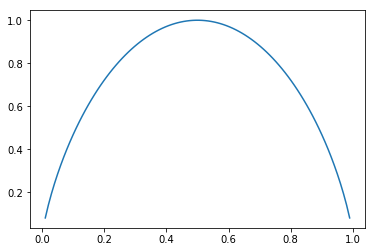

In [77]:
plt.plot(probs, entropy)
plt.show()

A máxima entropía, mayor incertidumbre (Máxima confusión)